### Download the languague model

In [5]:
from spacy.cli import download

download("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


C:\Users\Usuario\AppData\Roaming\Python\Python38\site-packages\pkg_resources\__init__.py:122: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(


In [185]:
#pip install pyvis

  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23688 sha256=ad40901a5cbe634ec0b7eed34b4bd367ef70ee4f39ca29b362e3cbef078f3ad2
  Stored in directory: c:\users\usuario\appdata\local\pip\cache\wheels\78\bb\02\40c79afcad1a632f7905a585ed3c5881737550400ff74ab6b5
Successfully built pyvis
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install decorator==5.0.9 

  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.6
    Uninstalling decorator-5.0.6:
      Successfully uninstalled decorator-5.0.6
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install python-louvain

  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9408 sha256=bf9c9740e3b334022a9d3ae43b9369b1a60ee32ffb8c9d3f7029be585441f038
  Stored in directory: c:\users\usuario\appdata\local\pip\cache\wheels\af\40\91\ef3635f7d3ddbd889b5af9f1ac22b8d30c48d6f744cd74a6d1
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import os
import re 
import matplotlib.pyplot as plt

# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

## Load books

In [286]:
# Get all book files in the data directory
all_books = [b for b in os.scandir('Books') if '.txt' in b.name]
all_books

[<DirEntry '00 - The Hobbit.txt'>,
 <DirEntry '01 - The Fellowship Of The Ring.txt'>,
 <DirEntry '02 - The Two Towers.txt'>,
 <DirEntry '03 - The Return Of The King.txt'>,
 <DirEntry '04 - LOR.txt'>]

In [291]:
# Setting nlp max_length
for file in os.scandir('Books'):
    with open(file, 'r', errors="ignore") as f:
        text = f.read()
        f.close()
    nlp.max_length = len(text) + 100

In [15]:
book = all_books[0]

In [25]:
with open(book,  'r', encoding='utf-8') as t:
    book_text =  t.read()
    t.close()



In [26]:
book_doc = nlp(book_text)

In [27]:
# Visualize identified entities
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

## Load character names

In [247]:
# Read characters
lor_characters_df = pd.read_csv("lor_characters.csv")
hobbit_characters_df = pd.read_csv("hobbit_characters.csv")

lor_characters_df['Book']='The Lord of the Rings'
hobbit_characters_df['Book']='The Hobbit'


### Fixing names I

In [248]:
characters_to_fix=[]
cond = hobbit_characters_df['Name']=='Tom, Bert, and William'
cond1 = hobbit_characters_df['Name']=='Fíli and Kíli'
characters_to_fix.append({'Name': 'Tom', "url": hobbit_characters_df['url'][cond].item(), 'Book': 'The Hobbit'})
characters_to_fix.append({'Name': 'Bert', "url": hobbit_characters_df['url'][cond].item(), 'Book': 'The Hobbit'})
characters_to_fix.append({'Name': 'William', "url": hobbit_characters_df['url'][cond].item(), 'Book': 'The Hobbit'})
characters_to_fix.append({'Name': 'Fíli', "url": hobbit_characters_df['url'][cond1].item(), 'Book': 'The Hobbit'})
characters_to_fix.append({'Name': 'Kíli', "url": hobbit_characters_df['url'][cond1].item(), 'Book': 'The Hobbit'})

characters_to_fix = pd.DataFrame(characters_to_fix)
hobbit_characters_df.drop(hobbit_characters_df[cond].index, inplace=True)
cond1 = hobbit_characters_df['Name']=='Fíli and Kíli'
hobbit_characters_df.drop(hobbit_characters_df[cond1].index, inplace=True)
hobbit_characters_df =  pd.concat([hobbit_characters_df,characters_to_fix]).reset_index(drop=True)

In [249]:
characters_to_fix=[]
cond = lor_characters_df['Name']=='Elladan and Elrohir'
characters_to_fix.append({'Name': 'Elladan', "url": lor_characters_df['url'][cond].item(), 'Book': 'The Lord of the Rings'})
characters_to_fix.append({'Name': 'Elrohir', "url": lor_characters_df['url'][cond].item(), 'Book': 'The Lord of the Rings'})

characters_to_fix = pd.DataFrame(characters_to_fix)
lor_characters_df.drop(lor_characters_df[cond].index, inplace=True)
lor_characters_df =  pd.concat([lor_characters_df,characters_to_fix]).reset_index(drop=True)

In [250]:
# Concatenating all the characters
characters_df =  pd.concat([lor_characters_df, hobbit_characters_df]).reset_index(drop=True)

In [244]:
characters_df

,Name,url,Book
0,Aragorn II Elessar,https://lotr.fandom.com/wiki/Aragorn_II_Elessar,The Lord of the Rings
1,Arwen,https://lotr.fandom.com/wiki/Arwen,The Lord of the Rings
2,Frodo Baggins,https://lotr.fandom.com/wiki/Frodo_Baggins,The Lord of the Rings
3,Beregond (Captain),https://lotr.fandom.com/wiki/Beregond_(Captain),The Lord of the Rings
4,Bergil,https://lotr.fandom.com/wiki/Bergil,The Lord of the Rings
5,Bilbo Baggins,https://lotr.fandom.com/wiki/Bilbo_Baggins,The Lord of the Rings
6,Fredegar Bolger,https://lotr.fandom.com/wiki/Fredegar_Bolger,The Lord of the Rings
7,Tom Bombadil,https://lotr.fandom.com/wiki/Tom_Bombadil,The Lord of the Rings
8,Boromir,https://lotr.fandom.com/wiki/Boromir,The Lord of the Rings
9,Meriadoc Brandybuck,https://lotr.fandom.com/wiki/Meriadoc_Brandybuck,The Lord of the Rings


### Fixing names II

In [251]:
# Remove brackets and text within brackets
characters_df['Name'] = characters_df['Name'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
# Separating first names
characters_df['Firstname'] = characters_df['Name'].apply(lambda x: x.split(' ', 1)[0])
#characters_df['Lastname'] = characters_df['Name'].apply(lambda x: (x.split(' ', 1)[0]) if (len(x.split(' ', 1))==1) else x.split(' ', 1)[1])

In [253]:
characters_df.iloc[characters_df[(characters_df['Firstname']=='Master')].index.values[0],-1]=characters_df.iloc[characters_df[(characters_df['Firstname']=='Master')].index.values[0],0]
characters_df.iloc[characters_df[(characters_df['Name']=='King of the Dead')].index.values[0],-1]=characters_df.iloc[characters_df[(characters_df['Name']=='King of the Dead')].index.values[0],0]
characters_df.iloc[characters_df[(characters_df['Name']=='Mrs. Proudfoot')].index.values[0],-1]=characters_df.iloc[characters_df[(characters_df['Name']=='Mrs. Proudfoot')].index.values[0],0]
characters_df.iloc[characters_df[(characters_df['Name']=='Mouth of Sauron')].index.values[0],-1]=characters_df.iloc[characters_df[(characters_df['Name']=='Mouth of Sauron')].index.values[0],0]
characters_df.iloc[characters_df[(characters_df['Name']=='Old Man Willow')].index.values[0],-1]=characters_df.iloc[characters_df[(characters_df['Name']=='Old Man Willow')].index.values[0],0]
characters_df.iloc[characters_df[(characters_df['Name']=='Old Noakes')].index.values[0],-1]=characters_df.iloc[characters_df[(characters_df['Name']=='Old Noakes')].index.values[0],0]

	
pd.set_option('display.max_rows', None)
characters_df = characters_df[['Firstname','Name','Book']]
characters_df

,Firstname,Name,Book
0,Aragorn,Aragorn II Elessar,The Lord of the Rings
1,Arwen,Arwen,The Lord of the Rings
2,Frodo,Frodo Baggins,The Lord of the Rings
3,Beregond,Beregond,The Lord of the Rings
4,Bergil,Bergil,The Lord of the Rings
5,Bilbo,Bilbo Baggins,The Lord of the Rings
6,Fredegar,Fredegar Bolger,The Lord of the Rings
7,Tom,Tom Bombadil,The Lord of the Rings
8,Boromir,Boromir,The Lord of the Rings
9,Meriadoc,Meriadoc Brandybuck,The Lord of the Rings


## Get named entity list per sentence

In [292]:

def ner_book(os_name):
    with open(os_name,  'r', encoding='utf-8') as t:
        s=nlp(t.read())
        t.close()
        return s
    
hobbit_doc = ner_book(all_books[0])
lor_doc = ner_book(all_books[4])


In [294]:

def entity_tag(book_doc):
    sent_entity_df = []
    # Loop through sentences, store named entity list for each sentence
    for sent in book_doc.sents:
        entity_list = [ent.text for ent in sent.ents]
        sent_entity_df.append({"sentence": sent, "entities": entity_list})
    return pd.DataFrame(sent_entity_df)

In [330]:
# Function to filter out non-character entities
def filter_entity(ent_list, characters_df):
    return [ent for ent in ent_list 
            if ent in list(characters_df.Name) 
            or ent in list(characters_df.Firstname)
            or ent in ['Sam','Isildur']]

In [303]:
hobbit_sent_entity_df = entity_tag(hobbit_doc) 


hobbit_sent_entity_df['character_entities'] = hobbit_sent_entity_df['entities'].apply(lambda x: filter_entity(x, characters_df))


# Filter out sentences that don't have any character entities
hobbit_sent_entity_df_filtered = hobbit_sent_entity_df[hobbit_sent_entity_df['character_entities'].map(len) > 0]


In [306]:
hobbit_sent_entity_df_filtered.to_csv('hobbit_sent_entity_df_filtered.csv', index=False)

In [304]:
lor_sent_entity_df = entity_tag(lor_doc)


lor_sent_entity_df['character_entities'] = lor_sent_entity_df['entities'].apply(lambda x: filter_entity(x, characters_df))

# Filter out sentences that don't have any character entities
lor_sent_entity_df_filtered = lor_sent_entity_df[lor_sent_entity_df['character_entities'].map(len) > 0]

In [333]:
lor_sent_entity_df_filtered.to_csv('lor_sent_entity_df_filtered.csv', index=False)

In [308]:
# Take only first name of characters
hobbit_sent_entity_df_filtered['character_entities'] = hobbit_sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])                                                                                                                             
lor_sent_entity_df_filtered['character_entities'] = lor_sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])

<ipython-input-308-d1010f2fd715>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hobbit_sent_entity_df_filtered['character_entities'] = hobbit_sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [335]:
pd.reset_option('^display.', silent=True)
lor_sent_entity_df_filtered

,sentence,entities,character_entities
10,"(The, process, had, begun, in, the, writing, o...","[Gondolin, Durin, Moria, Gandalf, Necromancer]",[Gandalf]
14,"(In, spite, of, the, darkness, of, the, next, ...","[the next five years, night, Balin, Moria]",[Balin]
17,"(In, the, next, year, I, wrote, the, first, dr...","[the next year, first, Book Three, Five, Anóri...",[Théoden]
19,"(It, was, during, 1944, that, ,, leaving, the,...","[1944, 1, Frodo, Mordor]",[Frodo]
42,"(Saruman, ,, failing, to, get, possession, of,...","[Saruman, Ring, Mordor, a Great Ring]",[Saruman]
...,...,...,...
37504,"(', Yes, ,, ', said, Gandalf, ;, ', for, it, w...","[Gandalf, three]",[Gandalf]
37508,"(Then, Frodo, kissed, Merry, and, Pippin, ,, a...","[Frodo, Merry, Pippin, Sam, Galadriel, Frodo]","[Frodo, Sam, Galadriel, Frodo]"
37509,"(And, the, ship, went, out, into, the, High, S...","[the High Sea, West, Frodo]",[Frodo]
37511,"(But, to, Sam, the, evening, deepened, to, dar...","[Sam, Haven, the grey sea, West]",[Sam]


## Create relationships

In [318]:
window_size = 7
    
def window_relation(window_size, sent_entity_df_filtered):
    relationships = []
    for i in range(sent_entity_df_filtered.index[-1]):
        end_i = min(i+window_size, sent_entity_df_filtered.index[-1])
        char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])

        # Remove duplicated characters that are next to each other
        char_unique = [char_list[i] for i in range(len(char_list)) 
                       if (i==0) or char_list[i] != char_list[i-1]]

        if len(char_unique) > 1:
            for idx, a in enumerate(char_unique[:-1]):
                b = char_unique[idx + 1]
                relationships.append({"source": a, "target": b})
    return pd.DataFrame(relationships)



In [339]:
hobbit_relationship_df = window_relation(window_size, hobbit_sent_entity_df_filtered)
lor_relationship_df = window_relation(window_size, lor_sent_entity_df_filtered)

In [355]:
# Fixing the Sam, Samwise problem I
for i in lor_relationship_df[(lor_relationship_df['source']=='Samwise')].index.values:
    lor_relationship_df.iloc[i,0] = 'Sam'
    

for i in lor_relationship_df[(lor_relationship_df['target']=='Samwise')].index.values:
    lor_relationship_df.iloc[i,1] = 'Sam'
    
lor_relationship_df.drop(lor_relationship_df[(lor_relationship_df['target']==lor_relationship_df['source']) ].index.values, inplace=True,)


In [320]:

def sum_relations(relationship_df):
    # Sort the cases with a->b and b->a
    relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
    # Sum the relations
    relationship_df["value"] = 1
    return relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [359]:
hobbit_relationship_df = sum_relations(hobbit_relationship_df)
lor_relationship_df = sum_relations(lor_relationship_df)

In [368]:
#hobbit_relationship_df.to_csv('hobbit_relationship_df', index=False)
#lor_relationship_df.to_csv('lor_relationship_df.csv', index=False)

In [2]:
hobbit_relationship_df = pd.read_csv('hobbit_relationship_df')
lor_relationship_df= pd.read_csv('lor_relationship_df.csv')

# Graph analysis and visualization

# The Hobbit

In [3]:
# Create a graph from a pandas dataframe
G_hobbit = nx.from_pandas_edgelist(hobbit_relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())


#### Graph visualization - Networkx

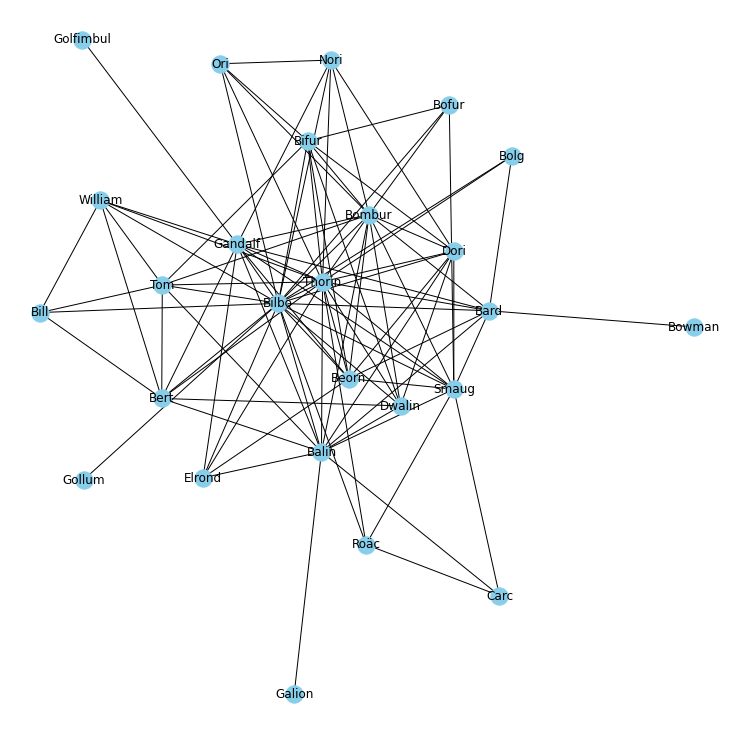

In [6]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G_hobbit)
nx.draw(G_hobbit, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

#### Graph visualization - Pyvis

In [4]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G_hobbit.degree)

#Setting up node size attribute
nx.set_node_attributes(G_hobbit, node_degree, 'size')

net.from_nx(G_hobbit)
net.show("TheHobbit.html")

### The most important characters in The Hobbit

In [10]:
# Degree centrality
degree_dict_hobbit = nx.degree_centrality(G_hobbit)
degree_dict_hobbit

{'Bilbo': 0.84,
 'Gandalf': 0.48,
 'Dwalin': 0.28,
 'Balin': 0.52,
 'Nori': 0.24,
 'Ori': 0.2,
 'Bifur': 0.36,
 'Bombur': 0.56,
 'Thorin': 0.72,
 'Bofur': 0.16,
 'Golfimbul': 0.04,
 'Smaug': 0.44,
 'William': 0.24,
 'Bert': 0.32,
 'Tom': 0.32,
 'Bill': 0.16,
 'Dori': 0.36,
 'Elrond': 0.2,
 'Gollum': 0.04,
 'Beorn': 0.36,
 'Galion': 0.04,
 'Bard': 0.36,
 'Bowman': 0.04,
 'Carc': 0.12,
 'Roäc': 0.16,
 'Bolg': 0.12}

<AxesSubplot:>

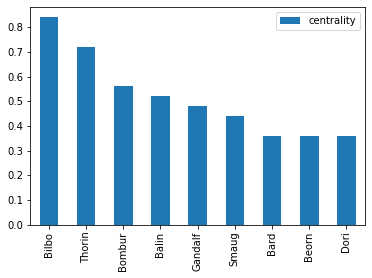

In [6]:
degree_df_hobbit = pd.DataFrame.from_dict(degree_dict_Hobbit, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df_hobbit.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

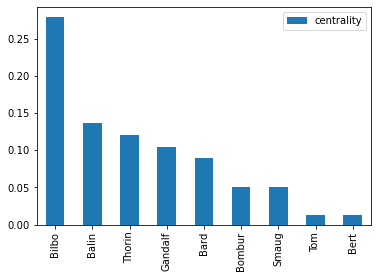

In [8]:
# Betweenness centrality
betweenness_dict_hobbit = nx.betweenness_centrality(G_hobbit)
betweenness_df_hobbit = pd.DataFrame.from_dict(betweenness_dict_hobbit, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df_hobbit.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

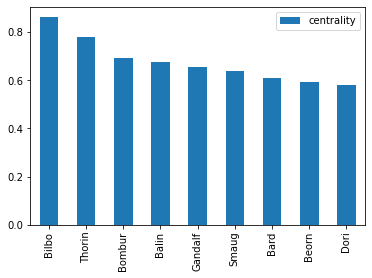

In [9]:
# Closeness centrality
closeness_dict_hobbit = nx.closeness_centrality(G_hobbit)
closeness_df_hobbit = pd.DataFrame.from_dict(closeness_dict_hobbit, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df_hobbit.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [11]:
# Save centrality measures
nx.set_node_attributes(G_hobbit, degree_dict_hobbit, 'degree_centrality')
nx.set_node_attributes(G_hobbit, betweenness_dict_hobbit, 'betweenness_centrality')
nx.set_node_attributes(G_hobbit, closeness_dict_hobbit, 'closeness_centrality')

# The Lord of the Rings

In [12]:
# Create a graph from a pandas dataframe
G_lor = nx.from_pandas_edgelist(lor_relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())


#### Graph visualization - Networkx

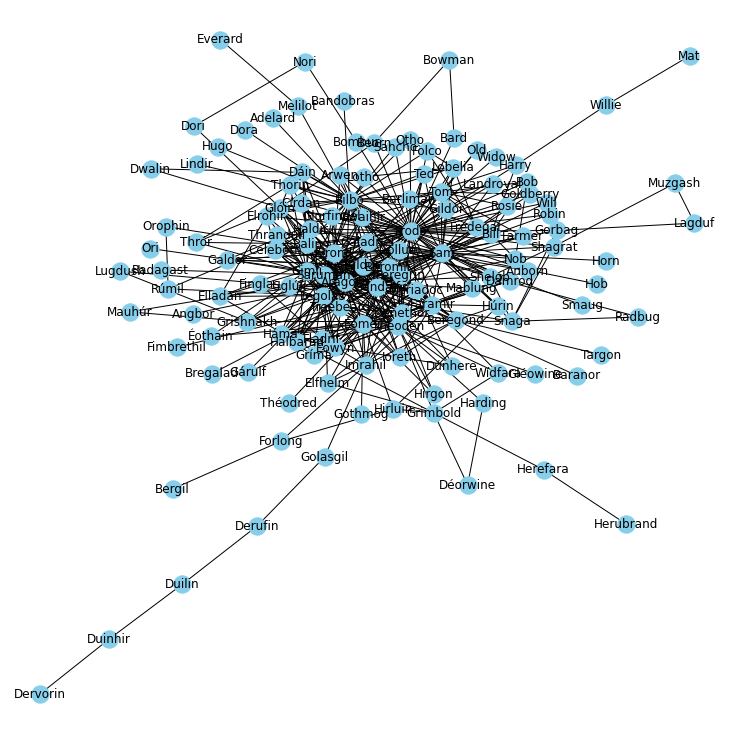

In [13]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G_lor)
nx.draw(G_lor, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

#### Graph visualization - Pyvis

In [13]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G_lor.degree)

#Setting up node size attribute
nx.set_node_attributes(G_lor, node_degree, 'size')

net.from_nx(G_lor)
net.show("Lor.html")

### The most important characters in The Lord of the Rings

In [14]:
# Degree centrality
degree_dict_lor = nx.degree_centrality(G_lor)
degree_dict_lor

{'Balin': 0.09230769230769231,
 'Gandalf': 0.26153846153846155,
 'Théoden': 0.2076923076923077,
 'Frodo': 0.5,
 'Bilbo': 0.2692307692307693,
 'Bandobras': 0.007692307692307693,
 'Thorin': 0.046153846153846156,
 'Gollum': 0.13846153846153847,
 'Sam': 0.3230769230769231,
 'Peregrin': 0.15384615384615385,
 'Arwen': 0.03076923076923077,
 'Meriadoc': 0.13846153846153847,
 'Elrond': 0.24615384615384617,
 'Celeborn': 0.07692307692307693,
 'Galadriel': 0.13076923076923078,
 'Old': 0.015384615384615385,
 'Lobelia': 0.05384615384615385,
 'Everard': 0.007692307692307693,
 'Melilot': 0.015384615384615385,
 'Adelard': 0.007692307692307693,
 'Dora': 0.007692307692307693,
 'Hugo': 0.007692307692307693,
 'Otho': 0.023076923076923078,
 'Sancho': 0.015384615384615385,
 'Folco': 0.023076923076923078,
 'Fredegar': 0.038461538461538464,
 'Ted': 0.03076923076923077,
 'Saruman': 0.23846153846153847,
 'Isildur': 0.13846153846153847,
 'Aragorn': 0.3153846153846154,
 'Lotho': 0.023076923076923078,
 'Gildor': 0.

<AxesSubplot:>

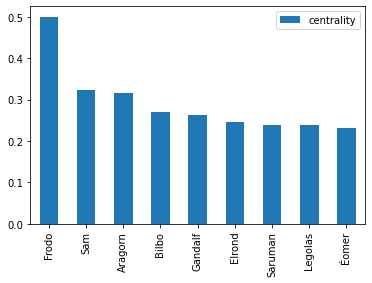

In [15]:
degree_df_lor = pd.DataFrame.from_dict(degree_dict_lor, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df_lor.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

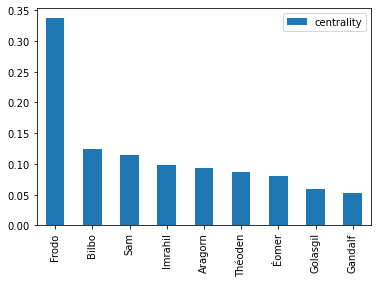

In [16]:
# Betweenness centrality
betweenness_dict_lor = nx.betweenness_centrality(G_lor)
betweenness_df_lor = pd.DataFrame.from_dict(betweenness_dict_lor, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df_lor.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

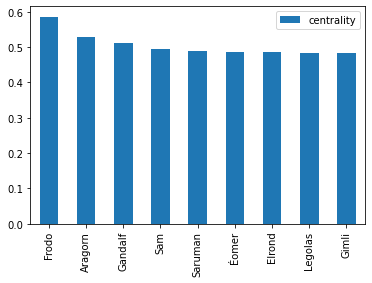

In [17]:
# Closeness centrality
closeness_dict_lor = nx.closeness_centrality(G_lor)
closeness_df_lor = pd.DataFrame.from_dict(closeness_dict_lor, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df_lor.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [18]:
# Save centrality measures
nx.set_node_attributes(G_lor, degree_dict_lor, 'degree_centrality')
nx.set_node_attributes(G_lor, betweenness_dict_lor, 'betweenness_centrality')
nx.set_node_attributes(G_lor, closeness_dict_lor, 'closeness_centrality')

### Community detection

## The Hobbit

In [20]:
import community as community_louvain

In [21]:
communities_hobbit = community_louvain.best_partition(G_hobbit)

In [22]:
communities_hobbit

{'Bilbo': 0,
 'Gandalf': 1,
 'Dwalin': 0,
 'Balin': 2,
 'Nori': 0,
 'Ori': 0,
 'Bifur': 0,
 'Bombur': 0,
 'Thorin': 1,
 'Bofur': 0,
 'Golfimbul': 1,
 'Smaug': 2,
 'William': 3,
 'Bert': 3,
 'Tom': 3,
 'Bill': 3,
 'Dori': 0,
 'Elrond': 1,
 'Gollum': 0,
 'Beorn': 1,
 'Galion': 2,
 'Bard': 1,
 'Bowman': 1,
 'Carc': 2,
 'Roäc': 2,
 'Bolg': 1}

In [23]:
nx.set_node_attributes(G_hobbit, communities_hobbit, 'group')

In [24]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G_hobbit)
com_net.show("hobbit_communities.html")

# The Lord of the Rings

In [25]:
communities_lor = community_louvain.best_partition(G_lor)

In [26]:
communities_lor

{'Balin': 0,
 'Gandalf': 2,
 'Théoden': 2,
 'Frodo': 3,
 'Bilbo': 0,
 'Bandobras': 0,
 'Thorin': 0,
 'Gollum': 2,
 'Sam': 3,
 'Peregrin': 2,
 'Arwen': 0,
 'Meriadoc': 2,
 'Elrond': 0,
 'Celeborn': 4,
 'Galadriel': 4,
 'Old': 3,
 'Lobelia': 3,
 'Everard': 0,
 'Melilot': 0,
 'Adelard': 0,
 'Dora': 0,
 'Hugo': 0,
 'Otho': 3,
 'Sancho': 0,
 'Folco': 3,
 'Fredegar': 3,
 'Ted': 3,
 'Saruman': 0,
 'Isildur': 2,
 'Aragorn': 4,
 'Lotho': 3,
 'Gildor': 0,
 'Farmer': 3,
 'Tom': 3,
 'Goldberry': 3,
 'Barliman': 3,
 'Harry': 3,
 'Nob': 3,
 'Will': 3,
 'Bob': 3,
 'Bill': 3,
 'Glorfindel': 0,
 'Elladan': 4,
 'Elrohir': 4,
 'Glóin': 0,
 'Beorn': 3,
 'Bowman': 3,
 'Bard': 3,
 'Dáin': 0,
 'Dwalin': 0,
 'Dori': 0,
 'Nori': 0,
 'Bombur': 0,
 'Lindir': 0,
 'Gimli': 4,
 'Círdan': 0,
 'Legolas': 4,
 'Thranduil': 4,
 'Boromir': 2,
 'Thrór': 0,
 'Denethor': 2,
 'Galdor': 0,
 'Radagast': 0,
 'Gwaihir': 3,
 'Húrin': 2,
 'Ori': 4,
 'Haldir': 4,
 'Rúmil': 4,
 'Orophin': 0,
 'Éomer': 2,
 'Éothain': 2,
 'Gárulf': 2,

In [27]:
nx.set_node_attributes(G_lor, communities_lor, 'group')

In [28]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G_lor)
com_net.show("lor_communities.html")